In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
path = '/Users/hringurd/Documents/School/Social_data_analysis/Final_Assignment/'

In [2]:
df = pd.read_csv(path + 'clean_311_data.csv')

In [41]:
df.shape

(1633417, 5)

In [4]:
df = df[df.Longitude != 0]

In [5]:
df.size

9800502

In [6]:
df = df[df.Latitude != 0]

In [7]:
df.size

9800502

In [8]:
df = df[['Opened','Category', 'Request Type', 'Latitude', 'Longitude']]

In [40]:
df[df.Category != 'Homeless Concerns']
df.size

8167085

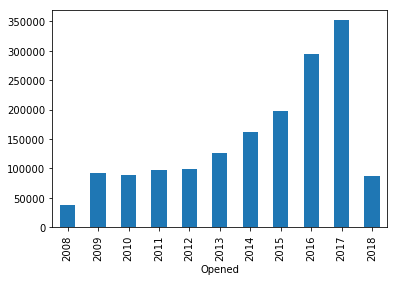

In [41]:
df["Opened"] = pd.to_datetime(df["Opened"], format="%m/%d/%Y %I:%M:%S %p")
df["Opened"].groupby(df["Opened"].dt.year).count().plot(kind="bar")
plt.show()

In [9]:
from collections import Counter

coll = Counter(df['Category'])

In [10]:
case_types = [x[0] for x in coll.most_common(5)]
case_types

['Street and Sidewalk Cleaning',
 'Graffiti',
 'Abandoned Vehicle',
 'Homeless Concerns',
 'Encampments']

In [11]:
df = df[df.Category.isin(case_types)]

In [12]:
df.size

8167085

In [13]:
#df.to_csv('clean_311_data.csv')

In [14]:
coll.most_common(20)

[('Street and Sidewalk Cleaning', 778282),
 ('Graffiti', 420379),
 ('Abandoned Vehicle', 178763),
 ('Homeless Concerns', 144948),
 ('Encampments', 111045)]

In [15]:
income_df = pd.read_csv('income.csv')

In [16]:
geo_id = income_df.geo.unique()

In [17]:
list(geo_id)[0][7:]

'06075010100'

In [18]:
geo_ids = [x[7:] for x in list(geo_id)]

In [19]:
with open(path + '06.geojson') as json_data:
    d = json.load(json_data)


In [20]:
tmp = []
for i in d['features']:
    if i['properties']['GEOID'] in geo_ids:
        tmp.append(i)

In [21]:
len(d['features'])

8057

In [22]:
#with open('geo_data.json', 'w') as outfile:
#    json.dump(d, outfile)

In [23]:
years = range(2008,2019)
df["Opened"] = pd.to_datetime(df["Opened"], format="%m/%d/%Y %I:%M:%S %p")

In [24]:
new_df = df[df.Category == 'Homeless Concerns']
for i in years:
    print(str(i) + ': ' + str(float(len(new_df[new_df.Opened.dt.year == i])/1.0)))

2008: 1811.0
2009: 5676.0
2010: 5937.0
2011: 5723.0
2012: 6585.0
2013: 9451.0
2014: 12479.0
2015: 17983.0
2016: 29906.0
2017: 39395.0
2018: 10002.0


In [25]:
len(new_df)

144948

In [26]:
new_df.size

724740

In [27]:
new_df.head()

,Opened,Category,Request Type,Latitude,Longitude
52,2008-12-30 12:15:08,Homeless Concerns,Medical Waste,37.75343,-122.4253
68,2008-12-30 10:20:51,Homeless Concerns,Human Waste,37.75093,-122.4134
69,2008-12-30 10:06:28,Homeless Concerns,Human Waste,37.80336,-122.4183
107,2008-12-29 22:45:54,Homeless Concerns,Human Waste,37.77457,-122.4126
122,2008-12-29 17:32:46,Homeless Concerns,Human Waste,37.79704,-122.4349


In [28]:
new_df.describe()

,Latitude,Longitude
count,144948.000000,144948.000000
mean,37.773494,-122.418707
std,0.063031,0.149085
min,30.009900,-141.218800
25%,37.765610,-122.420700
50%,37.776910,-122.415000
75%,37.783850,-122.410300
max,37.831660,-122.363400


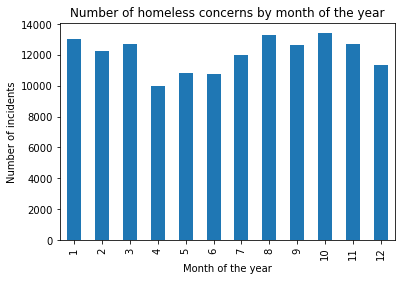

In [47]:
#new_df["Opened"] = pd.to_datetime(new_df["Opened"], format="%m/%d/%Y %I:%M:%S %p")
new_df["Opened"].groupby(new_df["Opened"].dt.month).count().plot(kind="bar")
plt.title('Number of homeless concerns by month of the year')
plt.ylabel('Number of incidents')
plt.xlabel('Month of the year')
plt.show()

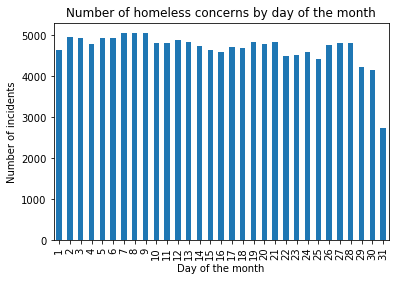

In [44]:
new_df["Opened"].groupby(new_df["Opened"].dt.day).count().plot(kind="bar")
plt.title('Number of homeless concerns by day of the month')
plt.ylabel('Number of incidents')
plt.xlabel('Day of the month')
plt.show()

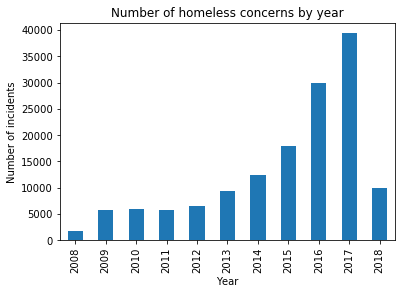

In [46]:
new_df["Opened"].groupby(new_df["Opened"].dt.year).count().plot(kind="bar")
plt.title('Number of homeless concerns by year')
plt.ylabel('Number of incidents')
plt.xlabel('Year')
plt.show()

In [40]:
new_df.iloc[52][0]

Timestamp('2008-12-22 13:21:25')

In [36]:
new_df

,Opened,Category,Request Type,Latitude,Longitude
52,2008-12-30 12:15:08,Homeless Concerns,Medical Waste,37.75343,-122.4253
68,2008-12-30 10:20:51,Homeless Concerns,Human Waste,37.75093,-122.4134
69,2008-12-30 10:06:28,Homeless Concerns,Human Waste,37.80336,-122.4183
107,2008-12-29 22:45:54,Homeless Concerns,Human Waste,37.77457,-122.4126
122,2008-12-29 17:32:46,Homeless Concerns,Human Waste,37.79704,-122.4349
135,2008-12-29 16:47:56,Homeless Concerns,Human Waste,37.71678,-122.4406
143,2008-12-29 16:30:23,Homeless Concerns,Human Waste,37.79072,-122.4043
148,2008-12-29 16:22:28,Homeless Concerns,Human Waste,37.72718,-122.4329
152,2008-12-29 16:05:00,Homeless Concerns,Human Waste,37.78260,-122.4150
157,2008-12-29 15:32:43,Homeless Concerns,Human Waste,37.75240,-122.4187
